<a href="https://colab.research.google.com/github/shashi3876/data_visualization/blob/main/VennDiagrams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load Data

To illustrate the application of Venn diagrams, we'll use the widely known Titanic dataset. You can loads it using the seaborn package.

The Titanic dataset includes several binary columns, like sex and survived, which can be directly used to define sets. For categorical columns with more than two categories, we can create sets by focusing on a specific value and considering all other values as the complement.

In [ ]:
import seaborn as sns

# Load the Titanic dataset
data = sns.load_dataset('titanic')

# Show the first few rows of the dataset
print(data.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [ ]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

## Venn diagrams for 2 sets

Let's now define two sets: is_male and has_survived, based on the main rows. Next, we'll use Python's Venn diagram functionality to generate a Venn diagram. For this, we will use the venn package, which is part of the matplotlib library.

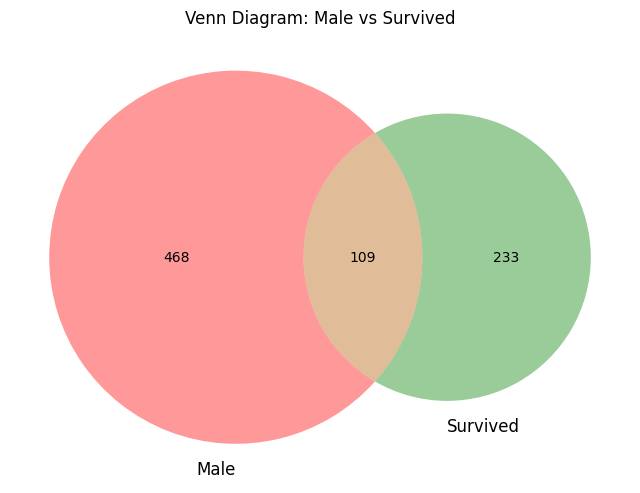

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Step 1: Define the two sets based on the conditions
is_male = set(data[data['sex'] == 'male'].index)  # Indices of rows where the person is male
has_survived = set(data[data['survived'] == 1].index)  # Indices of rows where the person survived

# Step 2: Create the Venn diagram with the proper sizes
plt.figure(figsize=(8, 8))
venn = venn2([is_male, has_survived], set_labels=('Male', 'Survived'))

# Step 3: Display the Venn diagram
plt.title("Venn Diagram: Male vs Survived")
plt.show()

Here you can see that there are 577 males (468 + 109) in the dataset, while 342 people survived (109 + 233). Out of 577 males, 109 survived, and 468 did not. Additionally, we observe that 233 survivors were female (since there are only two possible values for gender in this dataset).


However, this diagram appears somewhat different from the Venn diagrams we commonly see in mathematics. The main difference is that, in mathematics, we typically use a square to represent the universal set and circles to represent the individual sets. In most cases, we can also see how many items are not in a given set. However, the Venn diagram above does not include this information. For example, if you want to know how many females did not survive, the above Venn diagram would not be useful.


## Wrapper for the venn2 Function to Display a Square Representing the Universal Set

One way to address this issue is by using additional plotting functions on top of the venn2 function. Here, I've written a wrapper function around the venn2 function that generates a Venn diagram similar to the one shown above, with a square representing the universal set.

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import matplotlib.patches as patches

def plot_venn_with_square(universal, set1, set2, set1_label="Set 1", set2_label="Set 2"):
    """
    Plots a Venn diagram for two sets with a square representing the universal set.

    Parameters:
    - universal: Set containing all elements (universal set).
    - set1: Set representing the first group.
    - set2: Set representing the second group.
    - set1_label: Label for the first set.
    - set2_label: Label for the second set.
    """
    # Compute the necessary subsets for Venn diagram
    set1_size = len(set1)
    set2_size = len(set2)
    intersection_size = len(set1 & set2)

    # Subsets for the Venn diagram (Only Set1, Only Set2, Both)
    set1_only = set1_size - intersection_size
    set2_only = set2_size - intersection_size

    # Create a 2-set Venn diagram for set1 and set2
    plt.figure(figsize=(8, 8))
    venn = venn2(subsets=(set1_only, set2_only, intersection_size), set_labels=(set1_label, set2_label))

    # Extract the font size from the Venn diagram labels
    venn_label_fontsize = venn.get_label_by_id('10').get_fontsize()

    # Add a rectangle to represent the universal set (including all individuals)
    ax = plt.gca()

    # Dynamically get the limits of the current Venn diagram
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Adjust the rectangle based on the Venn diagram limits, with padding
    padding = 0.2
    rect_width = abs(xlim[1] - xlim[0]) + padding
    rect_height = abs(ylim[1] - ylim[0]) + padding
    rect_position = (xlim[0] - padding / 2, ylim[0] - padding / 2)  # Starting position

    # Create the rectangle (representing the universal set)
    rect = patches.Rectangle(rect_position, rect_width, rect_height, linewidth=2, edgecolor='black', facecolor='none', linestyle='-')
    ax.add_patch(rect)

    # Add text inside the rectangle but outside the Venn circles (text for elements not in Set1 and Set2)
    universal_only = len(universal - set1 - set2)
    plt.text(rect_position[0] + padding / 2, rect_position[1] + padding / 2, f"{universal_only}", fontsize=venn_label_fontsize, color='black')

    # Adjust axis limits to ensure the rectangle is visible and larger than the Venn diagram
    ax.set_xlim(xlim[0] - padding, xlim[1] + padding)
    ax.set_ylim(ylim[0] - padding, ylim[1] + padding)

    # Set the title and show the plot
    plt.title(f"Venn Diagram: {set1_label} vs {set2_label} with Universal Set")
    plt.show()


Now lets utilize the above function for our sets.

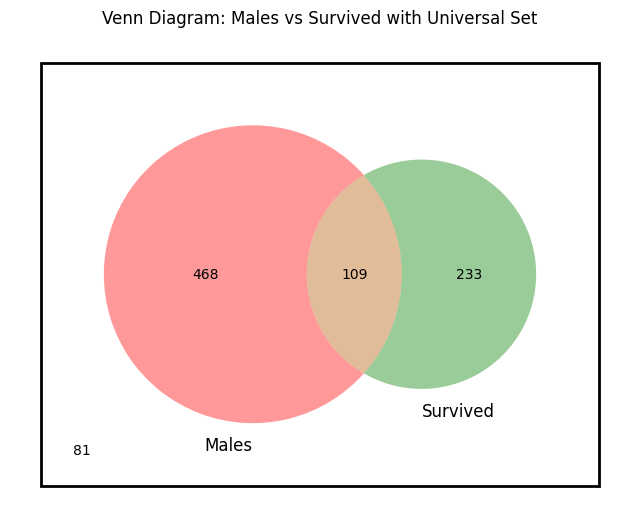

In [ ]:
# Example data from a DataFrame (you can replace this with your actual data)
males = set(data[data['sex'] == 'male'].index)
survived = set(data[data['survived'] == 1].index)
all_people = set(data.index)  # Universal set containing all rows

# Call the function with the three sets (all_people, males, survived)
plot_venn_with_square(all_people, males, survived, set1_label="Males", set2_label="Survived")

As seen in the figure above, we now have a better-looking Venn diagram. However, the code may break if different sizes of sets are used later on.

## Use of Venn3 to Display the Universal Set

Another option is to use the built-in Venn3 function to display the universal set. However, in this case, we see three circles instead of two circles and a square. Yet, this code may be more reliable as it leverages the built-in functionality from the matplotlib library.

/usr/local/lib/python3.10/dist-packages/matplotlib_venn/layout/venn3/pairwise.py:169: UserWarning: Bad circle positioning.
  warnings.warn("Bad circle positioning.")


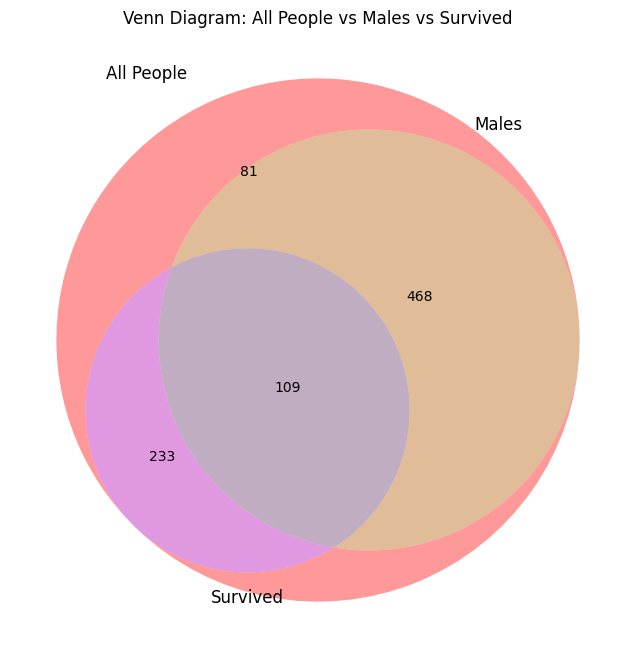

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# All individuals
all_people = set(data.index)

# Males in the dataset
is_male = set(data[data['sex'] == 'male'].index)

# People who survived in the dataset
is_survived = set(data[data['survived'] == 1].index)

# Create a 3-set Venn diagram
plt.figure(figsize=(8, 8))
venn = venn3([all_people, is_male, is_survived], set_labels=('All People', 'Males', 'Survived'))

# Set the title and show the plot
plt.title("Venn Diagram: All People vs Males vs Survived")
plt.show()



Even though it uses the built-in function, the figures don't look as good as our "MacGyvered" solution presented earlier. Another downside of this approach is that it can't accommodate more than two sets. The limit for Venn functions is three sets, but since we are using one of the available sets for the universal set, we are limited to only two sets in this approach.

##Venn diagram with three sets

Now let's extend the previous diagrams to include 3 sets. First, we need to define a third set to be plotted. Let's define a new set called is_third_class, which contains the passengers who were in the third class. We can then use the venn3method to easily plot the diagram.



In [ ]:
is_third_class = set(data[data['class'] == 'Third'].index)

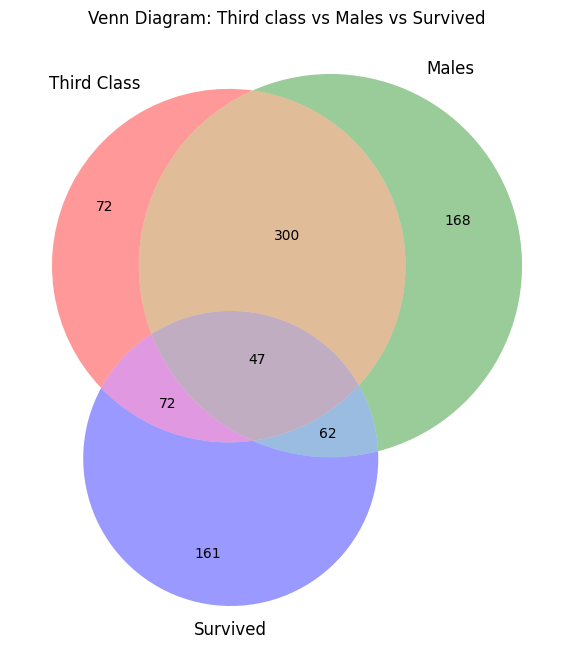

In [ ]:
# Create a 3-set Venn diagram
plt.figure(figsize=(8, 8))
venn = venn3([is_third_class, is_male, is_survived], set_labels=('Third Class', 'Males', 'Survived'))

# Set the title and show the plot
plt.title("Venn Diagram: Third class vs Males vs Survived")
plt.show()

As seen from the figure above, we can now observe how each set interacts with the others. We can see that 47 people who survived were in the third class and male. Additionally, 161 people who survived were neither in the third class nor male.

One thing to notice is that the circles are scaled according to the size of the sets. Even the intersected areas follow this scale. However, this can cause some issues. For example, if the number of items in a specific intersection is very small, that section may not be visible. To solve this problem, we can use the venn3_unweighted function while graphing.

/usr/local/lib/python3.10/dist-packages/matplotlib_venn/_util.py:62: UserWarning: venn3_unweighted is deprecated. Use venn3 with the appropriate layout_algorithm instead.
  warnings.warn(


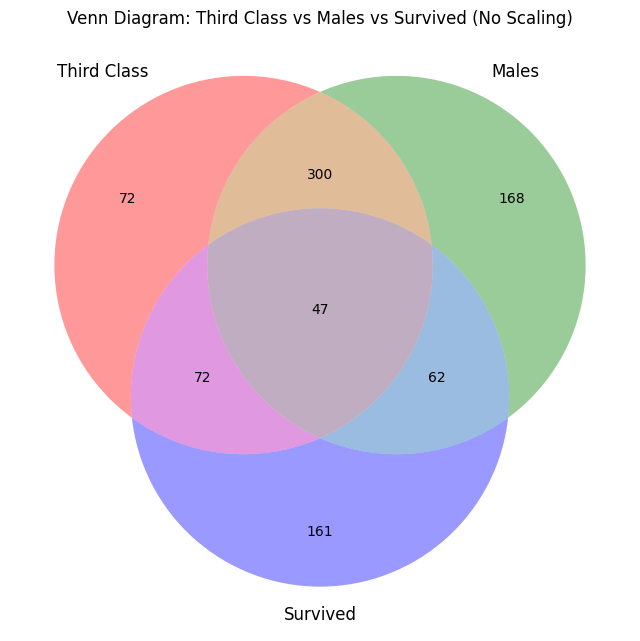

In [ ]:
from matplotlib_venn import venn3_unweighted

# Create a 3-set Venn diagram without scaling
plt.figure(figsize=(8, 8))
venn = venn3_unweighted([is_third_class, is_male, is_survived], set_labels=('Third Class', 'Males', 'Survived'), normalize_to=1.0)

# Set the title and show the plot
plt.title("Venn Diagram: Third Class vs Males vs Survived (No Scaling)")
plt.show()

Now we can see a more regular sized circle with the same sizes for all sets.

## Venn Diagram with Three Sets and Universal Set

Now we can do the same solution with three sets and a square for the universal set.

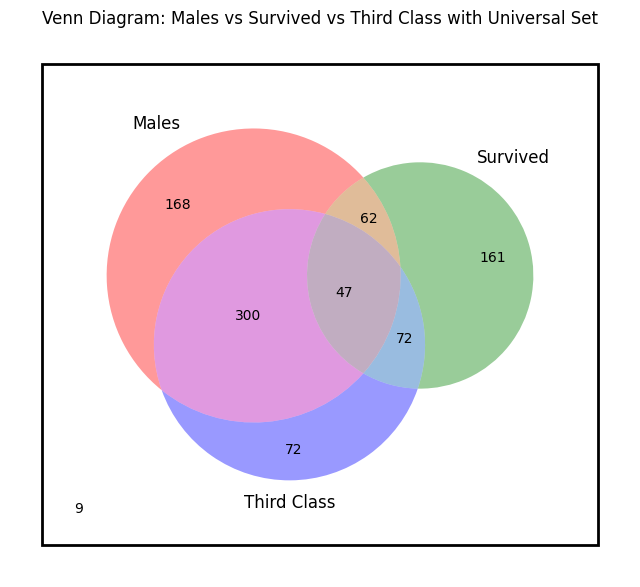

In [ ]:
def plot_venn_with_square(universal, set1, set2, set3, set1_label="Set 1", set2_label="Set 2", set3_label="Set 3"):
    """
    Plots a Venn diagram for three sets with a square representing the universal set.

    Parameters:
    - universal: Set containing all elements (universal set).
    - set1: Set representing the first group.
    - set2: Set representing the second group.
    - set3: Set representing the third group.
    - set1_label: Label for the first set.
    - set2_label: Label for the second set.
    - set3_label: Label for the third set.
    """
    # Compute the sizes of the subsets for the Venn diagram
    set1_size = len(set1)
    set2_size = len(set2)
    set3_size = len(set3)
    intersection_12 = len(set1 & set2)
    intersection_13 = len(set1 & set3)
    intersection_23 = len(set2 & set3)
    intersection_123 = len(set1 & set2 & set3)

    # Create a 3-set Venn diagram for set1, set2, and set3
    plt.figure(figsize=(8, 8))
    venn = venn3([set1, set2, set3], set_labels=(set1_label, set2_label, set3_label))

    # Extract the font size from the Venn diagram labels
    venn_label_fontsize = venn.get_label_by_id('100').get_fontsize() if venn.get_label_by_id('100') else 10

    # Add a rectangle to represent the universal set (including all individuals)
    ax = plt.gca()

    # Dynamically get the limits of the current Venn diagram
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Adjust the rectangle based on the Venn diagram limits, with padding
    padding = 0.2
    rect_width = abs(xlim[1] - xlim[0]) + padding
    rect_height = abs(ylim[1] - ylim[0]) + padding
    rect_position = (xlim[0] - padding / 2, ylim[0] - padding / 2)  # Starting position

    # Create the rectangle (representing the universal set)
    rect = patches.Rectangle(rect_position, rect_width, rect_height, linewidth=2, edgecolor='black', facecolor='none', linestyle='-')
    ax.add_patch(rect)

    # Add text inside the rectangle but outside the Venn circles (text for elements not in Set1, Set2, or Set3)
    universal_only = len(universal - set1 - set2 - set3)
    plt.text(rect_position[0] + padding / 2, rect_position[1] + padding / 2, f"{universal_only}", fontsize=venn_label_fontsize, color='black')

    # Adjust axis limits to ensure the rectangle is visible and larger than the Venn diagram
    ax.set_xlim(xlim[0] - padding, xlim[1] + padding)
    ax.set_ylim(ylim[0] - padding, ylim[1] + padding)

    # Set the title and show the plot
    plt.title(f"Venn Diagram: {set1_label} vs {set2_label} vs {set3_label} with Universal Set")
    plt.show()

# Example usage
plot_venn_with_square(all_people, males, survived, is_third_class, set1_label="Males", set2_label="Survived", set3_label='Third Class')

In the figure above, we see that there are 9 people who do not belong to any of the sets drawn. This corresponds to females who did not survive and were not in the third class.

## Limitations

Venn diagrams for more than three sets are not supported in Python. One reason is that with four circles, the number of overlapping sections increases, and it may not be possible to draw four circles in a way that displays all possible combinations of overlaps. Therefore, for more than three sets, different methods need to be employed. One suggestion is to use UpSet plots.

# Conclusion
Venn diagrams are a powerful tool for visualizing set relationships and providing insight into the intersections and differences between groups. While Venn diagrams work well for up to three sets, they become less practical for larger numbers due to the complexity of overlapping regions.

Additionally, typical Venn diagrams with a rectangle representing the universal set, as commonly taught in mathematics, are not natively supported in Python.
To address this limitation, the article provides a custom solution by introducing a wrapper function that extends the Venn diagrams for both two and three sets to include the universal set. This approach offers a more comprehensive and visually informative representation of the data.


Despite these challenges, Venn diagrams remain an accessible and effective tool for visualizing small-scale set relationships, as demonstrated with the Titanic dataset. By enhancing traditional Venn diagrams with universal sets and addressing scaling issues, these diagrams can be made even more informative and appealing. Ultimately, selecting the right visualization method depends on the number of sets and the clarity of the insights you wish to convey.